In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

### Load the geographic voter data

In [4]:
data_path = "geographic_voter_data.csv"  # Update this path if necessary
df = pd.read_csv(data_path)

### Create GeoDataFrame

In [5]:
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

### Load a basemap for Pittsburgh and define boundaries

In [27]:
world = gpd.read_file('geo')
pa = world[world['name'] == 'Pennsylvania']
#pittsburgh_bounds = [-81, -79, 40, 41]  # Longitude and latitude bounds for Pittsburgh

### Plot voters on the map

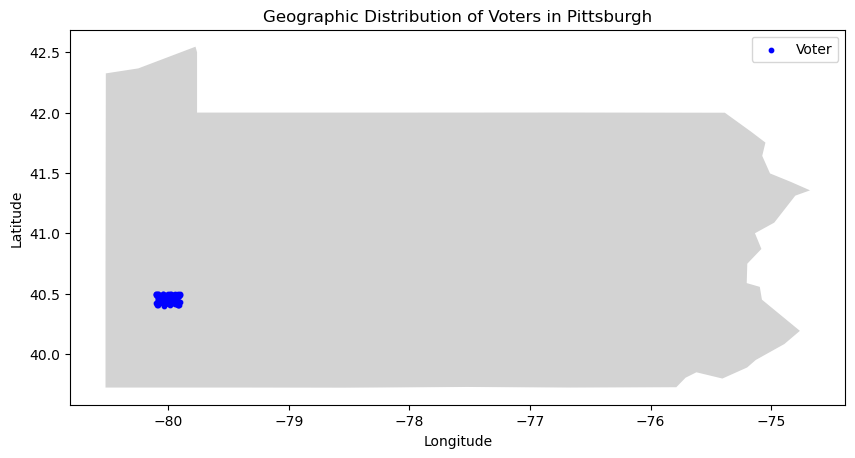

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
pa.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='blue', markersize=10, label='Voter')

# Set bounds for Pittsburgh and add labels
#ax.set_xlim(pittsburgh_bounds[:2])
#ax.set_ylim(pittsburgh_bounds[2:])
ax.set_title("Geographic Distribution of Voters in Pittsburgh")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Show plot
plt.show()